In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

import numpy as np

import matplotlib.pyplot as plt

import spacy

from wordcloud import WordCloud
import seaborn as sns

%matplotlib inline

import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#!python -m spacy download el_core_news_sm

2023-07-16 11:20:15.822054: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 82.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [4]:
start_page = 1
end_page = 23

start_url = 'https://www.athensvoice.gr/tags/trohaio-atyhima/?pg='

test_url = start_url + str(start_page)

In [5]:
response = requests.get(test_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [6]:
teaser_articles_list = doc.find('div', {'class': 'articles articles--singleColumn articles--large'}).find_all('article')

In [7]:
len(doc.find('div', {'class': 'articles articles--singleColumn articles--large'}).find_all('article'))

10

In [ ]:
teaser_articles_list[0]

In [ ]:
print(teaser_articles_list[0].prettify())

In [10]:
link = teaser_articles_list[0].find('a')['href']
print(link)

https://www.athensvoice.gr/epikairotita/ellada/808898/rio-mahi-gia-ti-zoi-dinei-i-14hroni-meta-apo-trohaio-me-mihanaki/


In [11]:
teasers_list = []

for page_num in range(start_page, end_page+1):
  page_url = start_url + str(page_num)
  response = requests.get(page_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  teaser_articles_list = doc.find('div', {'class': 'articles articles--singleColumn articles--large'}).find_all('article')


  for teaser in teaser_articles_list:
      story_dict = {}
      try:

        link = teaser.find('a')['href']


        if link.startswith("http"):
          story_dict['url'] = link
        else:
          story_dict['url'] = main_url + link
      except:
        story_dict['url'] = ''
        pass
      teasers_list.append(story_dict)
  time.sleep(1)

In [12]:
athensvoice_teasers_df = pd.DataFrame(teasers_list)
athensvoice_teasers_df

url
0    https://www.athensvoice.gr/epikairotita/ellada...
1    https://www.athensvoice.gr/epikairotita/ellada...
2    https://www.athensvoice.gr/epikairotita/ellada...
3    https://www.athensvoice.gr/epikairotita/ellada...
4    https://www.athensvoice.gr/epikairotita/ellada...
..                                                 ...
225  https://www.athensvoice.gr/epikairotita/ellada...
226  https://www.athensvoice.gr/epikairotita/ellada...
227  https://www.athensvoice.gr/epikairotita/ellada...
228  https://www.athensvoice.gr/life/health-fitness...
229  https://www.athensvoice.gr/epikairotita/ellada...

[230 rows x 1 columns]

In [15]:
athensvoice_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Telikh Ergasia Tsalla Vasilikh.csv', index=False)

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
article_url = 'https://www.athensvoice.gr/epikairotita/ellada/616514/sovaro-trohaio-sti-gefyra-rioy-antirrioy/'

In [17]:
response = requests.get(article_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [ ]:
article = doc.find('div', {'class': 'articleSingle__description'})
print(article.prettify())

In [19]:
section = doc.find('a', {'class': 'articleSingle__category'}).text
section

'Ελλαδα'

In [20]:
title = doc.find('h1', {'class': 'articleSingle__title'}).text
title

'Σοβαρό τροχαίο στη Γέφυρα Ρίου – Αντιρρίου'

In [21]:
date = doc.find('time')['datetime']
print (date)

2020-01-26T07:00:37Z


In [ ]:
paragraphs = doc.find_all('p')
paragraphs

In [23]:
p_texts_list = []
paragraphs = doc.find_all('p')
for p in paragraphs:
  p_texts_list.append(p.text)
full_text = ' '.join(p_texts_list)
full_text = "".join(full_text.splitlines())
full_text

'Ανετράπη Ι.Χ. λίγο μετά τα διόδια Αυτοκίνητο ανετράπη στη Γέφυρα Ρίου-Αντιρρίου χωρίς να τραυματισθεί ο οδηγός. Έρευνα για τα αίτια του ατυχήματος διενεργεί η Τροχαία.  Σοβαρό τροχαίο σημειώθηκε το βράδυ του Σαββάτου στη Γέφυρα Ρίου – Αντιρρίου. Ειδικότερα, Ι.Χ. αυτοκίνητο που κινούνταν πάνω στη γέφυρα, ανετράπη, χωρίς να τραυματιστεί ο οδηγός του. Το αυτοκίνητο ανετράπη λίγα μέτρα μετά τα διόδια και είχε κατεύθυνση προς το Ρίο, ενώ χρειάστηκε να διακοπεί για λίγη ώρα η κυκλοφορία προς Ρίο. Έρευνα για τα αίτια του τροχαίου ατυχήματος διενεργεί η τροχαία αυτοκινητοδρόμων. '

In [24]:
athensvoice_teasers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Telikh Ergasia Tsalla Vasilikh.csv')
athensvoice_teasers_df

url
0    https://www.athensvoice.gr/epikairotita/ellada...
1    https://www.athensvoice.gr/epikairotita/ellada...
2    https://www.athensvoice.gr/epikairotita/ellada...
3    https://www.athensvoice.gr/epikairotita/ellada...
4    https://www.athensvoice.gr/epikairotita/ellada...
..                                                 ...
225  https://www.athensvoice.gr/epikairotita/ellada...
226  https://www.athensvoice.gr/epikairotita/ellada...
227  https://www.athensvoice.gr/epikairotita/ellada...
228  https://www.athensvoice.gr/life/health-fitness...
229  https://www.athensvoice.gr/epikairotita/ellada...

[230 rows x 1 columns]

In [25]:
full_articles_list = []

for article_url in athensvoice_teasers_df['url']:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  article = doc.find('div', {'class': 'articleSingle__description'})

  full_article_dict = {}

  # website
  full_article_dict['site'] = "athensvoice.gr"

  # url
  full_article_dict['url'] = article_url

  #section
  try:
    section = doc.find('a', {'class': 'articleSingle__category'}).text
    full_article_dict['section'] = section
  except:
    full_article_dict['section'] = ''
    pass

  #title
  try:
    title = doc.find('h1', {'class': 'articleSingle__title'}).text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = ''
    pass

  # date
  try:
    date = doc.find('time')['datetime']
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass

  # full_text
  try:
    p_texts_list = []
    paragraphs = article.find_all('p')
    for p in paragraphs:
      p_texts_list.append(p.text)
    full_text = ' '.join(p_texts_list)
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text
  except:
    full_article_dict['full_text'] = ''
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)

In [26]:
athensvoice_full_articles_df = pd.DataFrame(full_articles_list)
athensvoice_full_articles_df

site                                                url  \
0    athensvoice.gr  https://www.athensvoice.gr/epikairotita/ellada...   
1    athensvoice.gr  https://www.athensvoice.gr/epikairotita/ellada...   
2    athensvoice.gr  https://www.athensvoice.gr/epikairotita/ellada...   
3    athensvoice.gr  https://www.athensvoice.gr/epikairotita/ellada...   
4    athensvoice.gr  https://www.athensvoice.gr/epikairotita/ellada...   
..              ...                                                ...   
225  athensvoice.gr  https://www.athensvoice.gr/epikairotita/ellada...   
226  athensvoice.gr  https://www.athensvoice.gr/epikairotita/ellada...   
227  athensvoice.gr  https://www.athensvoice.gr/epikairotita/ellada...   
228  athensvoice.gr  https://www.athensvoice.gr/life/health-fitness...   
229  athensvoice.gr  https://www.athensvoice.gr/epikairotita/ellada...   

              section                                              title  \
0              Ελλαδα  Μάχη για τη ζωή δίνει η 14χρονη μετά από τροχα...   
1              Ελλαδα  Αυτοκίνητο έπεσε σε γκρεμό στην Κρήτη - Εγκλωβ...   
2              Ελλαδα  Ένας τραυματίας σε τροχαίο με αγριογούρουνο στ...   
3              Ελλαδα  Tροχαίο ατύχημα με νταλίκα που κουβαλούσε λαμα...   
4              Ελλαδα  Πάτρα: Διασωληνωμένη 14χρονη έπειτα από τροχαί...   
..                ...                                                ...   
225            Ελλαδα      Θεσσαλονίκη: Αυτοκίνητο «καρφώθηκε» σε κολόνα   
226            Ελλαδα   Στη ΜΕΘ του ΓΝΑ μεταφέρθηκε ο Τάσος Μπουντούρης    
227            Ελλαδα  Τάσος Μπουντούρης: Βίντεο-ντοκουμέντο αμέσως μ...   
228  Health & Fitness  Τάσος Μπουντούρης: Οδύσσεια για ένα κρεβάτι Εν...   
229            Ελλαδα  Σε κρίσιμη κατάσταση ο Ολυμπιονίκης Τάσος Μπου...   

                     date                                          full_text  
0    2023-07-14T08:29:00Z  Η 14χρονη Χριστίνα βρίσκεται σε κρίσιμη κατάστ...  
1    2023-07-12T05:26:22Z  Ένα τροχαίο ατύχημα σημειώθηκε στα Φαλάσαρνα Κ...  
2    2023-07-11T17:38:19Z  Ένας 37χρονος άνδρας τραυματίστηκε μετά από τρ...  
3    2023-07-11T12:35:21Z  Κλειστός είναι περίπου από τις 12:30 ο αυτοκιν...  
4    2023-07-10T04:55:24Z  Μάχη για να κρατηθεί στη ζωή δίνει μια 14χρονη...  
..                    ...                                                ...  
225  2020-01-24T08:24:00Z  Τροχαίο ατύχημα σημειώθηκε τα ξημερώματα της Π...  
226  2020-01-22T12:33:00Z  Στη Μονάδα Εντατικής Θεραπείας του 251 Γενικού...  
227  2020-01-21T14:55:28Z  Σε κρίσιμη, αλλά σταθερή κατάσταση νοσηλεύεται...  
228  2020-01-21T14:09:00Z  Εκτός από μάχη να κρατηθεί στη ζωή, ο ολυμπιον...  
229  2020-01-21T07:34:00Z  Σε κρίσιμη κατάσταση νοσηλεύεται ο ολυμπιονίκη...  

[230 rows x 6 columns]

In [27]:
athensvoice_full_articles_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Telikh Ergasia Tsalla Vasilikh.csv')

In [28]:
athensvoice_full_articles_df['clean_text'] = athensvoice_full_articles_df['full_text'].str.replace("Διαβάστε περισσότερα...", "")

<ipython-input-28-2c4552454ca8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  athensvoice_full_articles_df['clean_text'] = athensvoice_full_articles_df['full_text'].str.replace("Διαβάστε περισσότερα...", "")


In [29]:
athensvoice_full_articles_df.loc[0, 'date']

'2023-07-14T08:29:00Z'

In [30]:
athensvoice_full_articles_df.dtypes

site          object
url           object
section       object
title         object
date          object
full_text     object
clean_text    object
dtype: object

In [31]:
athensvoice_full_articles_df['datetime'] = pd.to_datetime(athensvoice_full_articles_df['date'], format='%Y.%m.%d %H:%M')

In [32]:
athensvoice_full_articles_df.dtypes

site                       object
url                        object
section                    object
title                      object
date                       object
full_text                  object
clean_text                 object
datetime      datetime64[ns, UTC]
dtype: object

In [33]:
short_athensvoice_df = athensvoice_full_articles_df[['datetime','full_text']]
short_athensvoice_df.head(1)

datetime                                          full_text
0 2023-07-14 08:29:00+00:00  Η 14χρονη Χριστίνα βρίσκεται σε κρίσιμη κατάστ...

In [ ]:
short_athensvoice_df['year'] = pd.DatetimeIndex(short_athensvoice_df['datetime']).year
short_athensvoice_df['month'] = pd.DatetimeIndex(short_athensvoice_df['datetime']).month
short_athensvoice_df['day'] = pd.DatetimeIndex(short_athensvoice_df['datetime']).day
short_athensvoice_df['hour'] = pd.DatetimeIndex(short_athensvoice_df['datetime']).hour

In [35]:
short_athensvoice_df.head()

datetime  \
0 2023-07-14 08:29:00+00:00   
1 2023-07-12 05:26:22+00:00   
2 2023-07-11 17:38:19+00:00   
3 2023-07-11 12:35:21+00:00   
4 2023-07-10 04:55:24+00:00   

                                           full_text    year  month   day  \
0  Η 14χρονη Χριστίνα βρίσκεται σε κρίσιμη κατάστ...  2023.0    7.0  14.0   
1  Ένα τροχαίο ατύχημα σημειώθηκε στα Φαλάσαρνα Κ...  2023.0    7.0  12.0   
2  Ένας 37χρονος άνδρας τραυματίστηκε μετά από τρ...  2023.0    7.0  11.0   
3  Κλειστός είναι περίπου από τις 12:30 ο αυτοκιν...  2023.0    7.0  11.0   
4  Μάχη για να κρατηθεί στη ζωή δίνει μια 14χρονη...  2023.0    7.0  10.0   

   hour  
0   8.0  
1   5.0  
2  17.0  
3  12.0  
4   4.0

In [36]:
text = short_athensvoice_df[(short_athensvoice_df['year'] > 2020) & (short_athensvoice_df['year'] < 2023) ]['full_text'].str.cat(sep = ' ')

<Axes: >

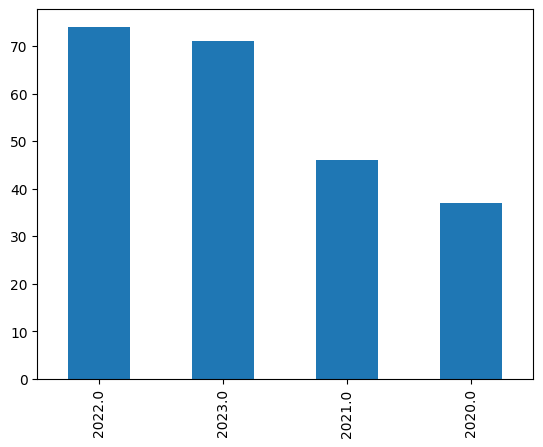

In [53]:
short_athensvoice_df['year'].value_counts().plot(kind='bar')

In [38]:
text = short_athensvoice_df['full_text'].str.cat(sep = ' ')

In [39]:
nlp = spacy.load('el_core_news_sm')

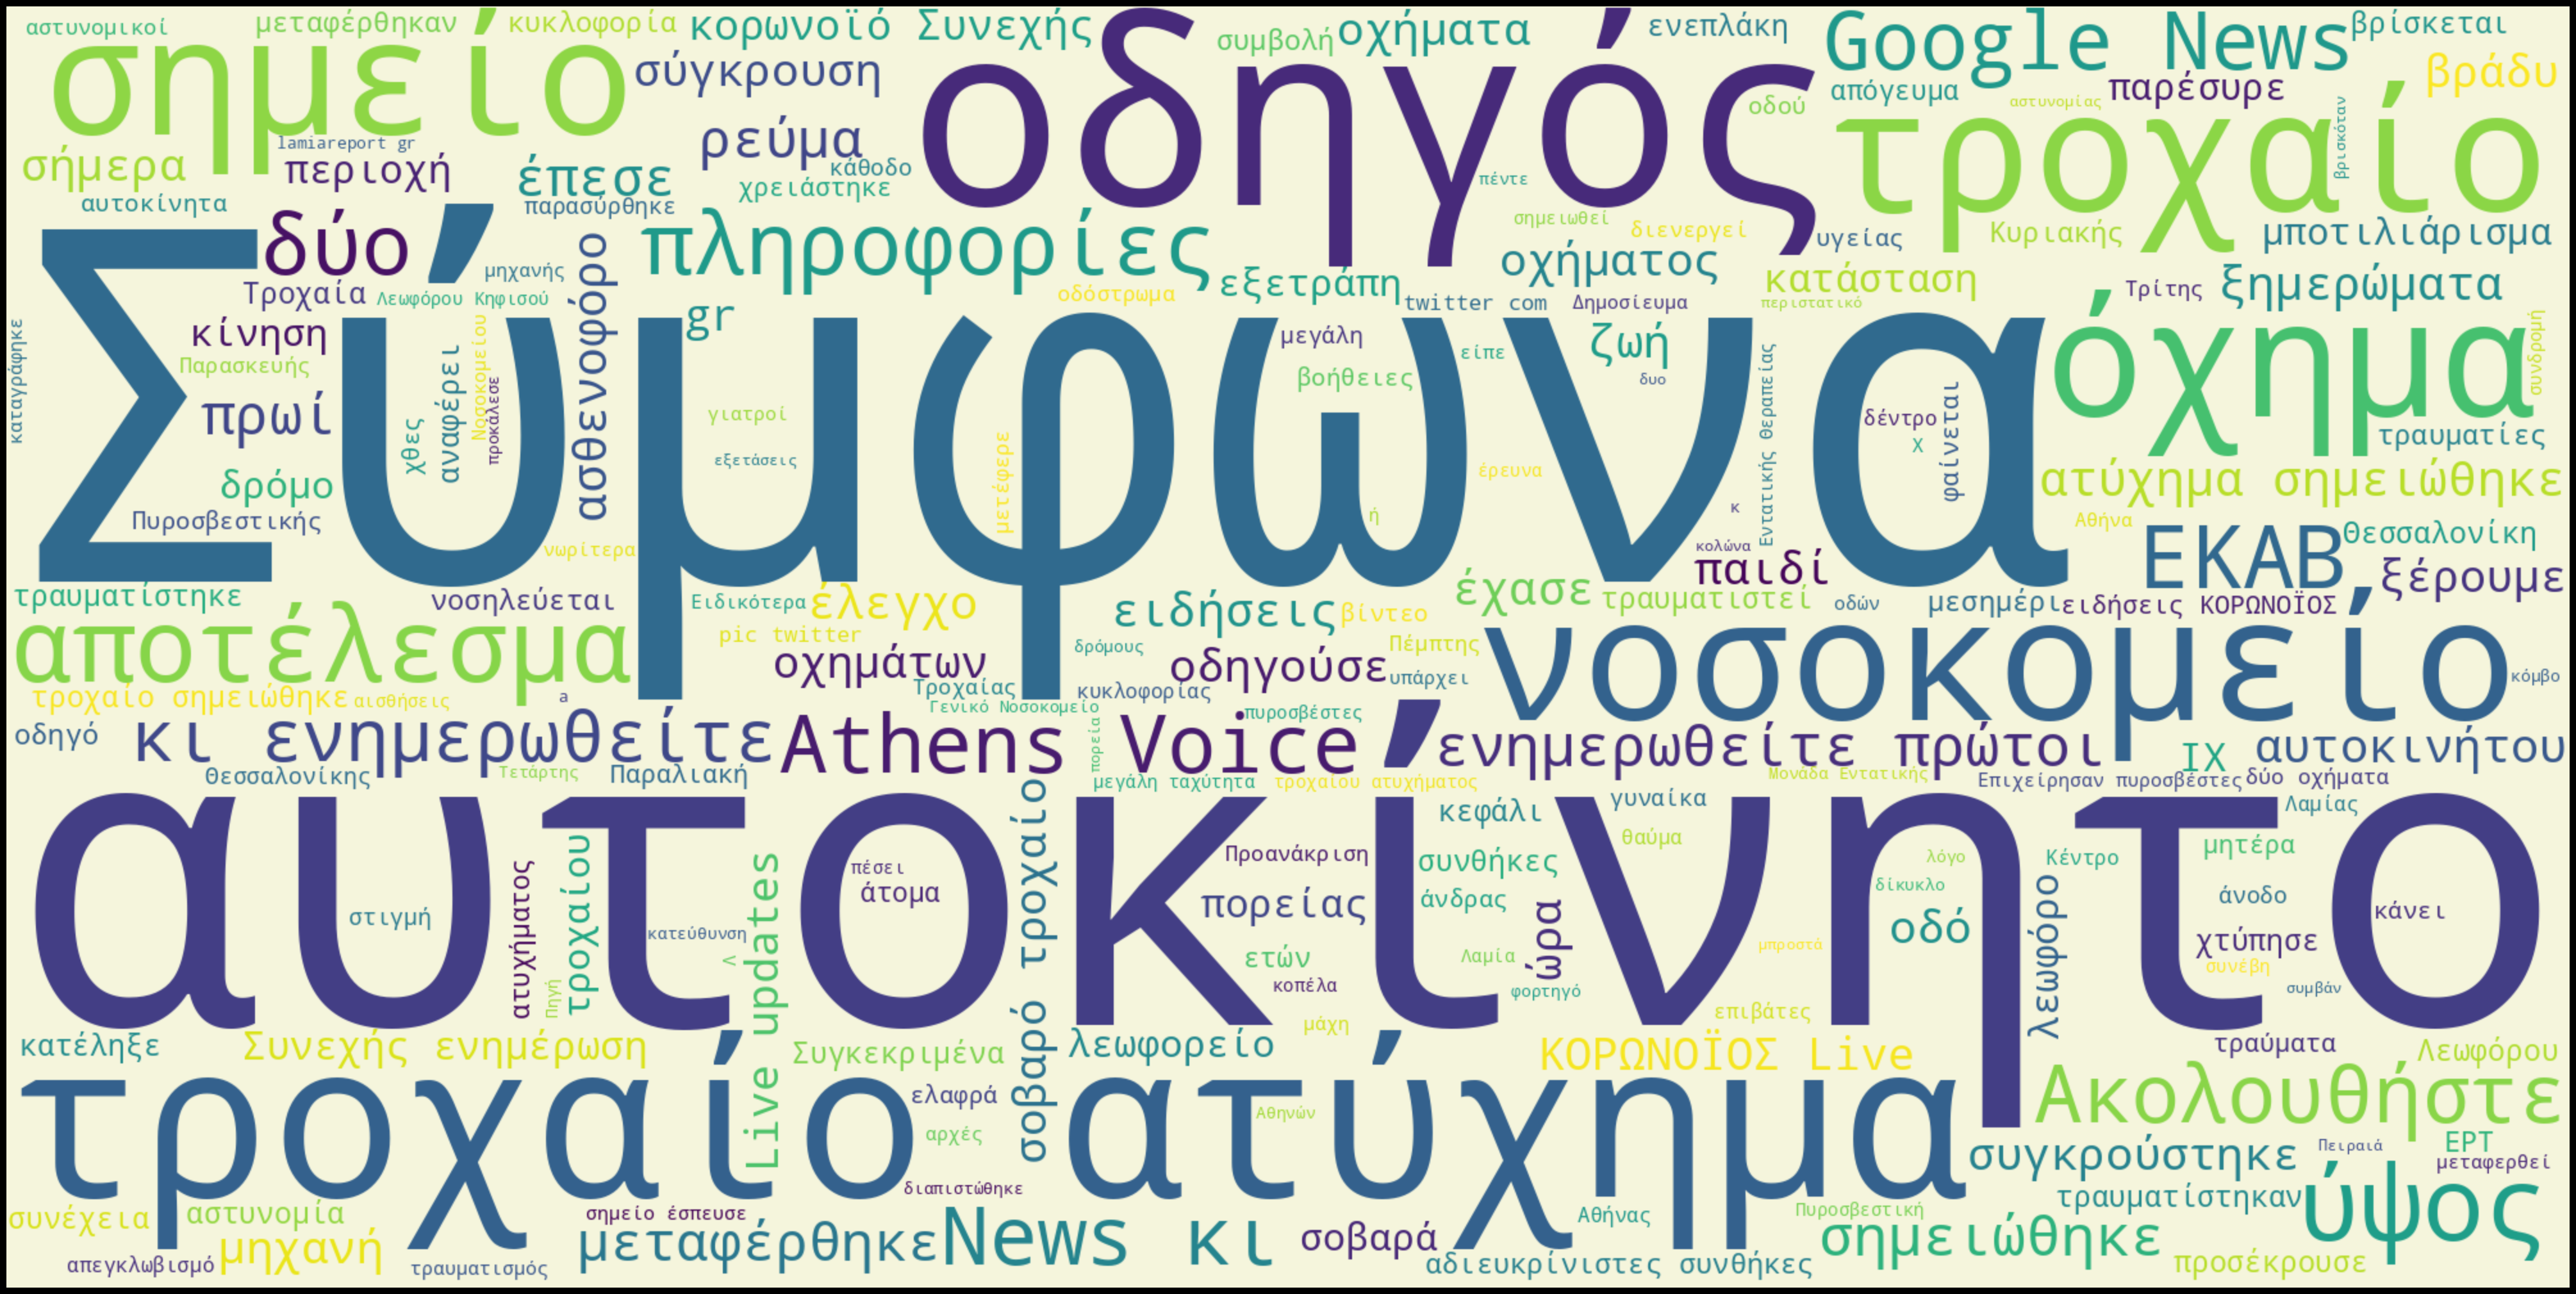

In [43]:
wordcloud1 = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'beige'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
wordcloud1.to_file('/content/drive/MyDrive/Colab Notebooks/wordcloud1.png')

In [44]:
full_doc = nlp(text)

In [45]:
small_txt = 'ένα αυτοκίνητο έπεσε υπό'

In [46]:
small_doc = nlp(small_txt)
for token in small_doc:
  print (token, ' ',token.lemma )

ένα   3955702389344751046
αυτοκίνητο   7220928953821008123
έπεσε   11422556666057644545
υπό   12708013495687508125


In [47]:
lemmatized_text = ' '.join(token.lemma_ for token in full_doc)

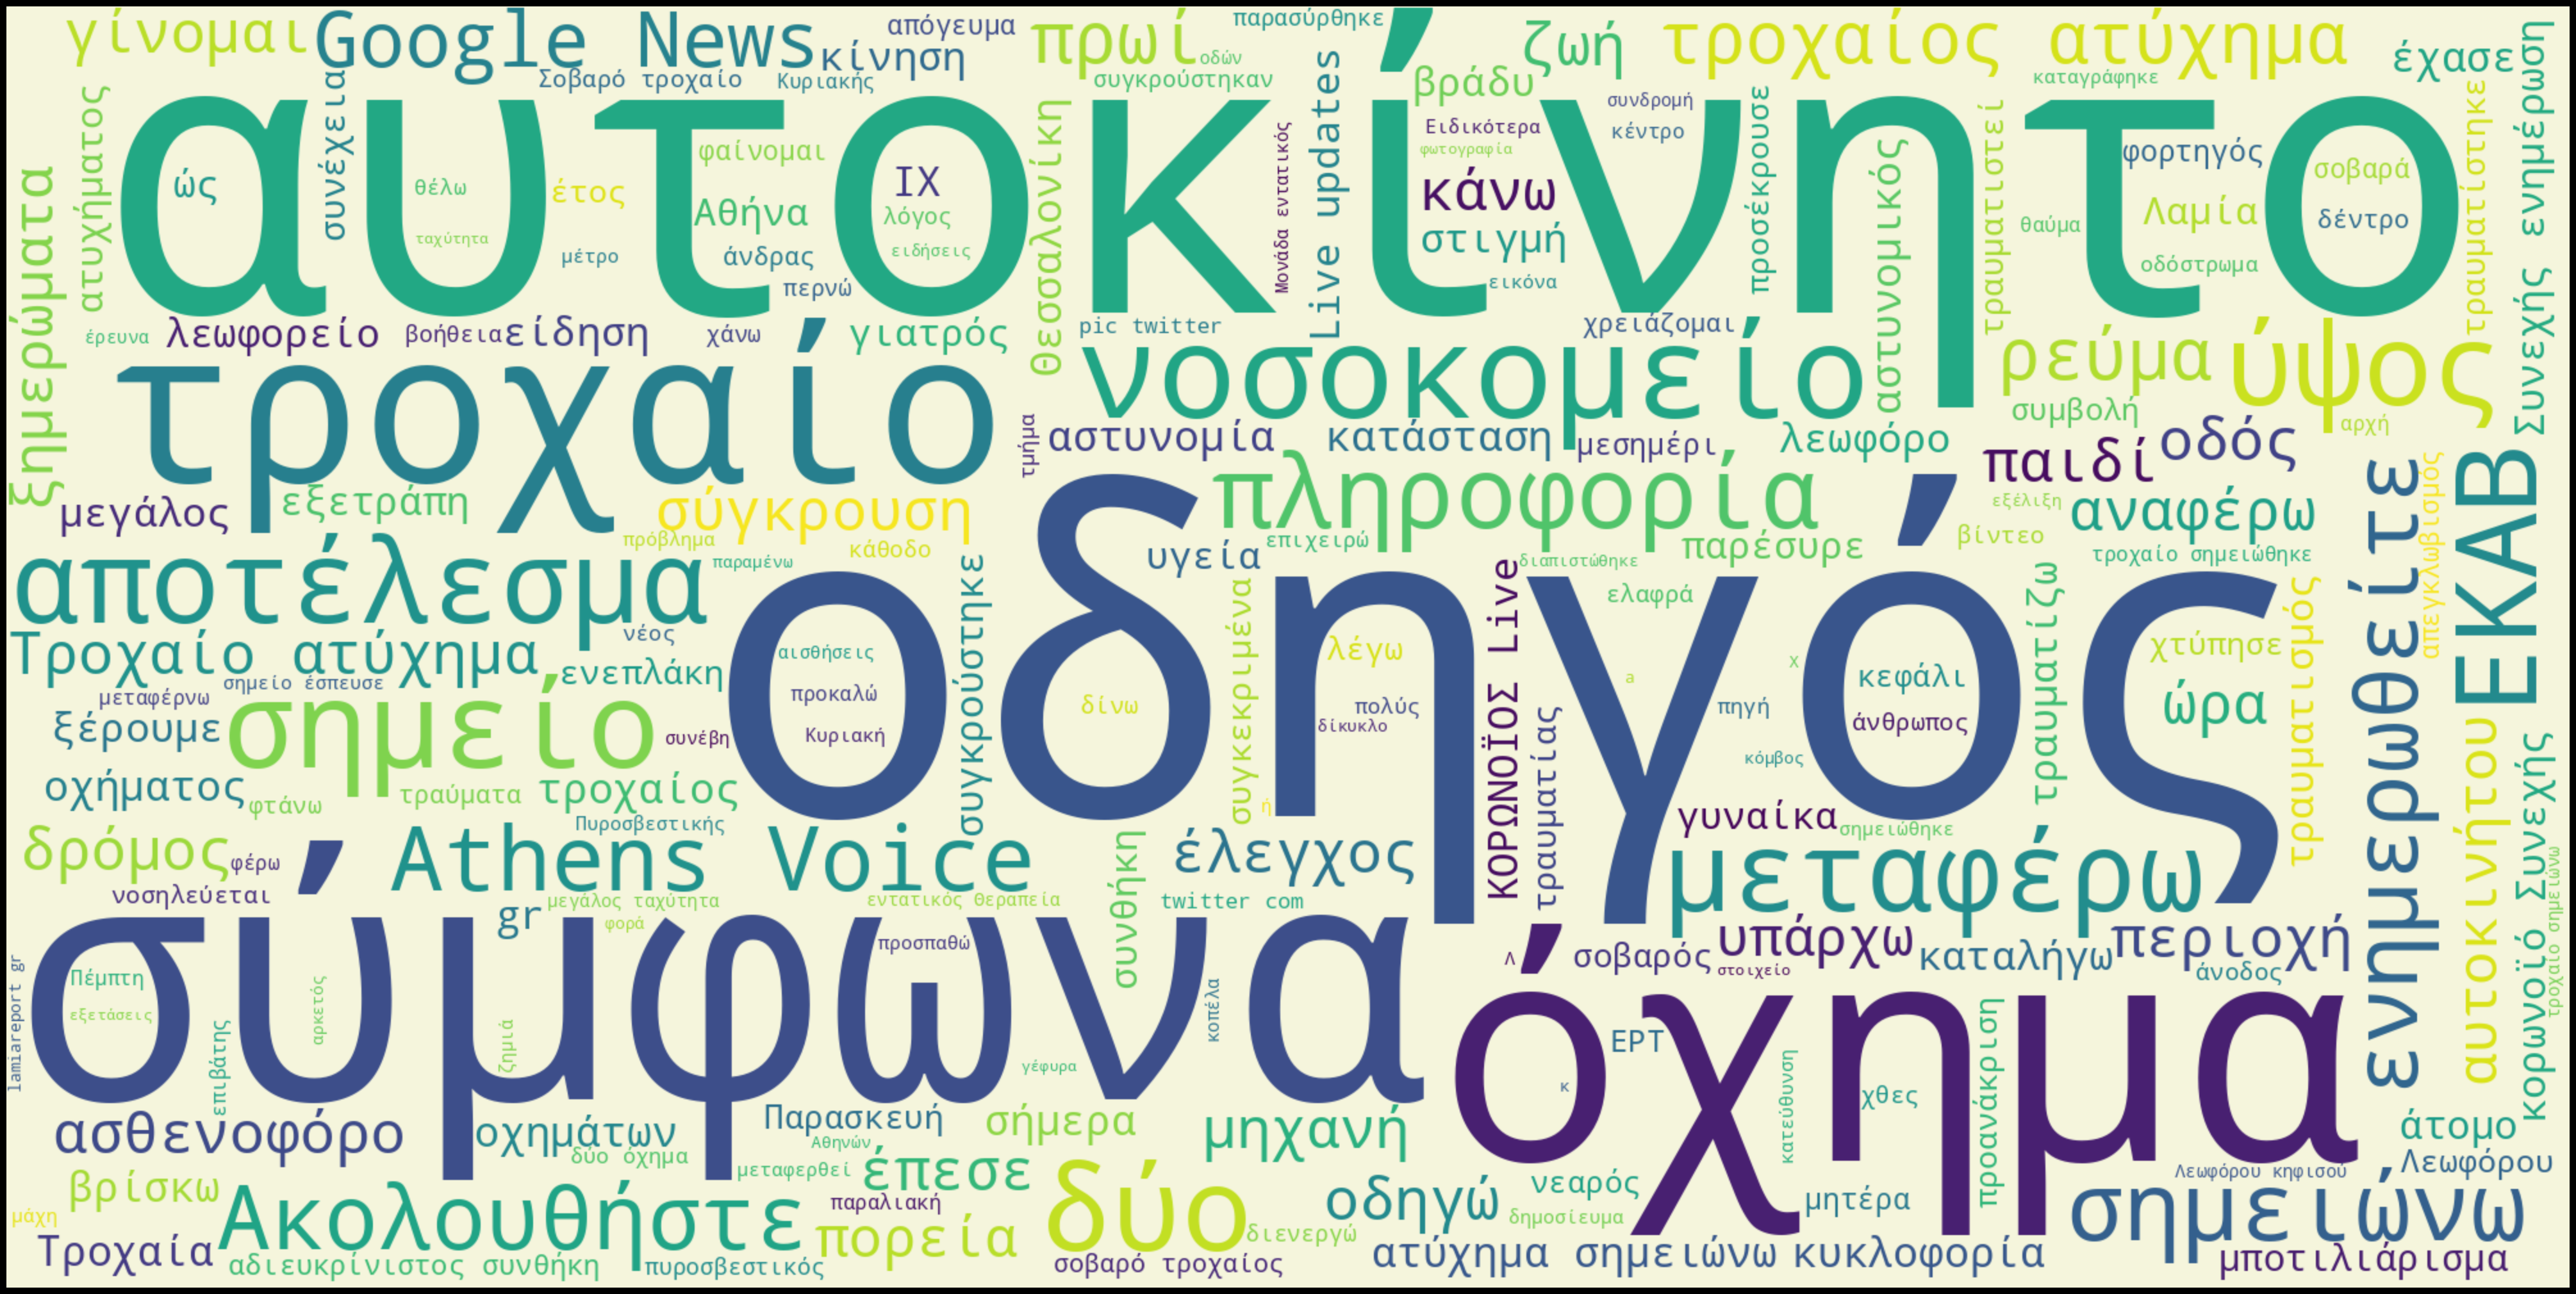

In [48]:
wordcloud2 = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'beige'
 ).generate(lemmatized_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
wordcloud2.to_file('/content/drive/MyDrive/Colab Notebooks/wordcloud2.png')

In [49]:
cv = CountVectorizer()

In [50]:
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])

In [51]:
count_vector.shape

(230, 4933)

In [59]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

In [53]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])

In [60]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

In [55]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [56]:
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])

In [58]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

In [61]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())


In [62]:
results.sum(axis =0).sort_values(ascending = False)

τροχαίο        270
αυτοκίνητο     158
σύμφωνα        150
ατύχημα        149
σημειώθηκε     139
οδηγός         134
νοσοκομείο     123
σημείο         113
δύο            107
όχημα           98
πληροφορίες     81
ύψος            77
κι              77
αποτέλεσμα      77
εκαβ            74
gr              72
ρεύμα           71
news            71
google          65
οχήματα         64
dtype: int64

In [63]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

τροχαίο       270
αυτοκίνητο    158
σύμφωνα       150
ατύχημα       149
σημειώθηκε    139
dtype: int64

In [64]:
sum_words.sort_values(ascending = True).head(15).plot(kind='barh')

<Axes: >

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_athensvoice_df['full_text'])

In [67]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

In [69]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [70]:
arr = cosine_similarity(tfidf_matrix_train[0:50], tfidf_matrix_train[0:50])

<Axes: title={'center': 'Βαθμός ομοιότητας των 50 πρώτων άρθρων'}>

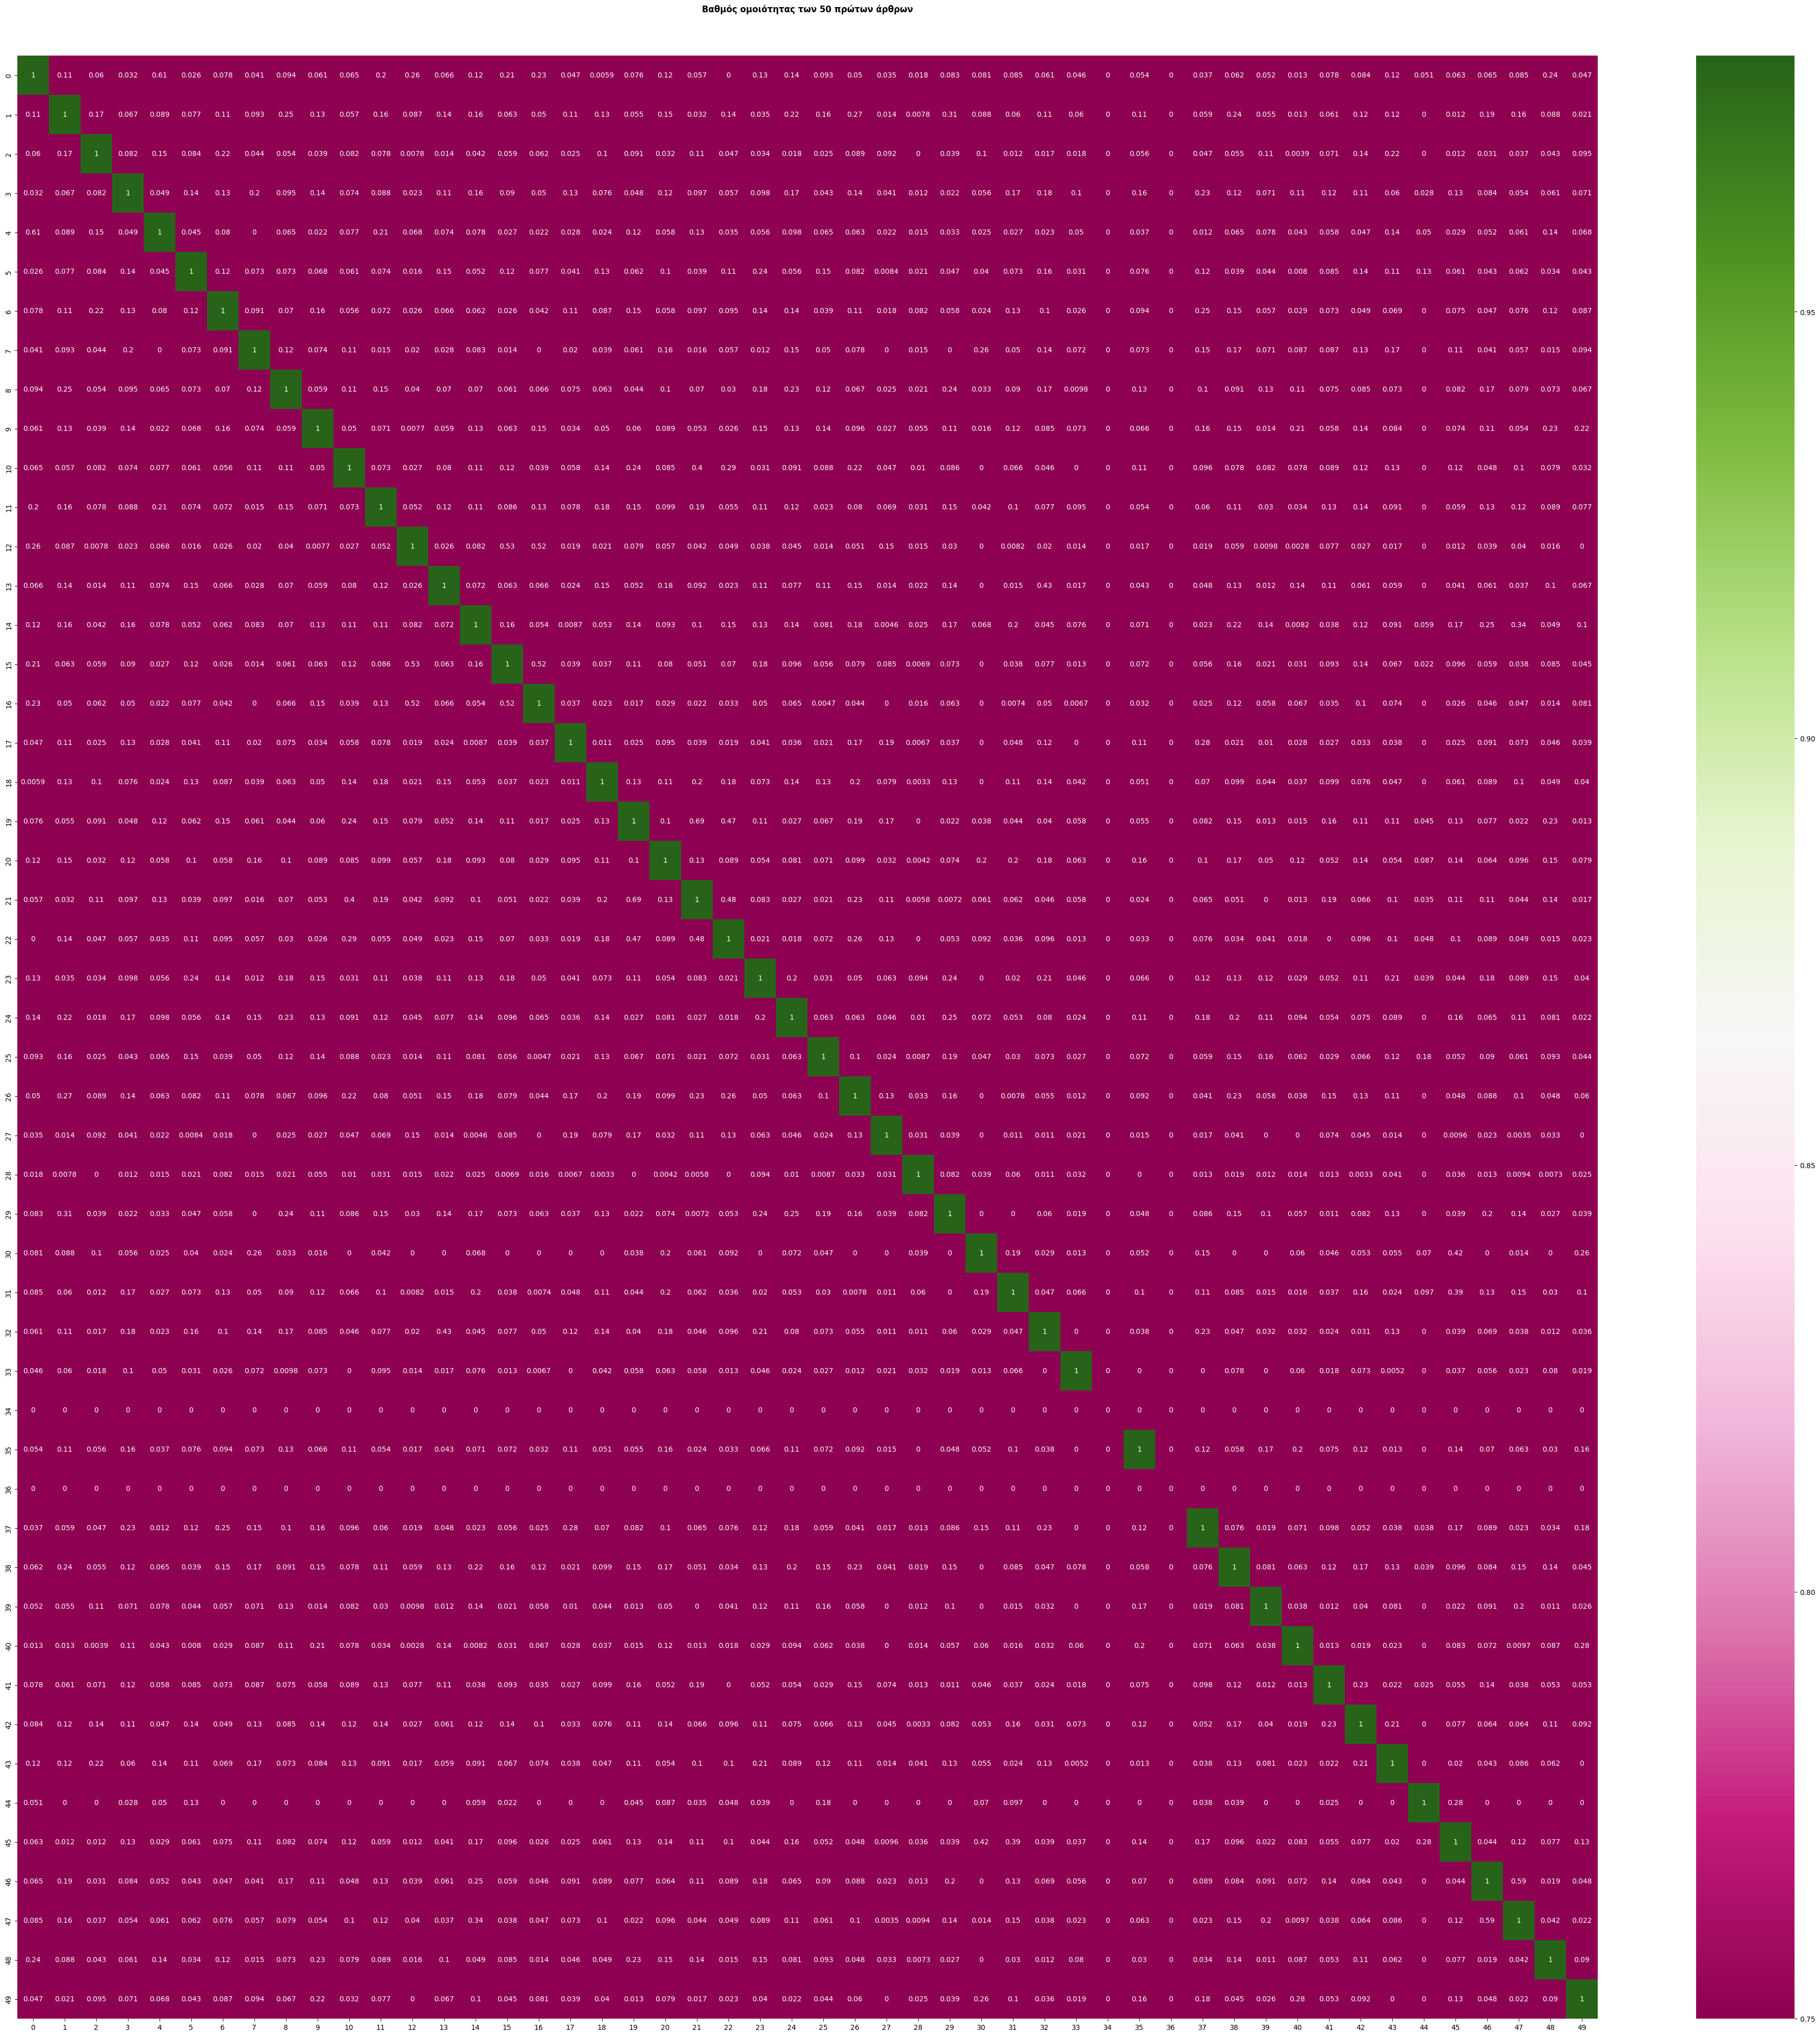

In [71]:
plt.figure(figsize=(50, 50))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 50 πρώτων άρθρων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

In [72]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [73]:
emolex_df = pd.read_csv(filepath)

In [74]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [75]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2)) #και μονές λέξεις και ζευγάρια λέξεων

In [76]:
matrix = vec.fit_transform(short_athensvoice_df['full_text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

In [77]:

positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']


angry_words = emolex_df[emolex_df.Anger == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [78]:
wordcount_df[trust_words]

αμην  γαμηλιο ταξιδι  διευθυντρια σχολειου  επικοινωνω  εκκλησια  \
0       0               0                     0           0         0   
1       0               0                     0           0         0   
2       0               0                     0           0         0   
3       0               0                     0           0         0   
4       0               0                     0           0         0   
..    ...             ...                   ...         ...       ...   
225     0               0                     0           0         0   
226     0               0                     0           0         0   
227     0               0                     0           0         0   
228     0               0                     0           0         0   
229     0               0                     0           0         0   

     εν τω μεταξυ  ευαγγελιο  κυριε  λιστα ελεγχου  λυρικη σκηνη  ...  \
0               0          0      0              0             0  ...   
1               0          0      0              0             0  ...   
2               0          0      0              0             0  ...   
3               0          0      0              0             0  ...   
4               0          0      0              0             0  ...   
..            ...        ...    ...            ...           ...  ...   
225             0          0      0              0             0  ...   
226             0          0      0              0             0  ...   
227             0          0      0              0             0  ...   
228             0          0      0              0             0  ...   
229             0          0      0              0             0  ...   

     ηλιακο ωρολογιο  συνεργιστικος  διπλο ποδηλατο  ισαξιος  ανακωχη  αληθης  \
0                  0              0               0        0        0       0   
1                  0              0               0        0        0       0   
2                  0              0               0        0        0       0   
3                  0              0               0        0        0       0   
4                  0              0               0        0        0       0   
..               ...            ...             ...      ...      ...     ...   
225                0              0               0        0        0       0   
226                0              0               0        0        0       0   
227                0              0               0        0        0       0   
228                0              0               0        0        0       0   
229                0              0               0        0        0       0   

     αναμφιβολως  ανυπερβατος  αναθηματικος  αποδειξη πληρωμης  
0              0            0             0                  0  
1              0            0             0                  0  
2              0            0             0                  0  
3              0            0             0                  0  
4              0            0             0                  0  
..           ...          ...           ...                ...  
225            0            0             0                  0  
226            0            0             0                  0  
227            0            0             0                  0  
228            0            0             0                  0  
229            0            0             0                  0  

[230 rows x 1259 columns]

In [79]:
wordcount_df[trust_words].sum(axis=1)

0      3
1      2
2      4
3      3
4      3
      ..
225    2
226    2
227    5
228    3
229    4
Length: 230, dtype: int64

In [80]:
short_athensvoice_df['anger'] = wordcount_df[angry_words].sum(axis=1) #axis = row

short_athensvoice_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_athensvoice_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_athensvoice_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_athensvoice_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_athensvoice_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_athensvoice_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_athensvoice_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_athensvoice_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_athensvoice_df['fear'] = wordcount_df[fear_words].sum(axis=1)

<ipython-input-80-cc18a51b108d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_athensvoice_df['anger'] = wordcount_df[angry_words].sum(axis=1) #axis = row


In [81]:
short_athensvoice_df

datetime  \
0   2023-07-14 08:29:00+00:00   
1   2023-07-12 05:26:22+00:00   
2   2023-07-11 17:38:19+00:00   
3   2023-07-11 12:35:21+00:00   
4   2023-07-10 04:55:24+00:00   
..                        ...   
225 2020-01-24 08:24:00+00:00   
226 2020-01-22 12:33:00+00:00   
227 2020-01-21 14:55:28+00:00   
228 2020-01-21 14:09:00+00:00   
229 2020-01-21 07:34:00+00:00   

                                             full_text    year  month   day  \
0    Η 14χρονη Χριστίνα βρίσκεται σε κρίσιμη κατάστ...  2023.0    7.0  14.0   
1    Ένα τροχαίο ατύχημα σημειώθηκε στα Φαλάσαρνα Κ...  2023.0    7.0  12.0   
2    Ένας 37χρονος άνδρας τραυματίστηκε μετά από τρ...  2023.0    7.0  11.0   
3    Κλειστός είναι περίπου από τις 12:30 ο αυτοκιν...  2023.0    7.0  11.0   
4    Μάχη για να κρατηθεί στη ζωή δίνει μια 14χρονη...  2023.0    7.0  10.0   
..                                                 ...     ...    ...   ...   
225  Τροχαίο ατύχημα σημειώθηκε τα ξημερώματα της Π...  2020.0    1.0  24.0   
226  Στη Μονάδα Εντατικής Θεραπείας του 251 Γενικού...  2020.0    1.0  22.0   
227  Σε κρίσιμη, αλλά σταθερή κατάσταση νοσηλεύεται...  2020.0    1.0  21.0   
228  Εκτός από μάχη να κρατηθεί στη ζωή, ο ολυμπιον...  2020.0    1.0  21.0   
229  Σε κρίσιμη κατάσταση νοσηλεύεται ο ολυμπιονίκη...  2020.0    1.0  21.0   

     hour  anger  positive  joy  disgust  surprise  trust  anticipation  \
0     8.0      6         3    2        3         4      3             3   
1     5.0      1         0    0        1         1      2             0   
2    17.0      1         3    1        3         2      4             2   
3    12.0      1         3    0        3         0      3             2   
4     4.0      2         2    1        0         1      3             1   
..    ...    ...       ...  ...      ...       ...    ...           ...   
225   8.0      1         2    0        1         1      2             0   
226  12.0      0         1    1        0         0      2             1   
227  14.0      0         0    0        1         0      5             0   
228  14.0      3         2    1        1         0      3             2   
229   7.0      3         7    2        3         0      4             3   

     sadness  negative  fear  
0          4         6     6  
1          2         1     3  
2          2         5     4  
3          1         1     2  
4          1         2     3  
..       ...       ...   ...  
225        2         1     3  
226        0         0     0  
227        2         1     3  
228        1         4     5  
229        1         3     2  

[230 rows x 16 columns]

In [82]:
short_athensvoice_df.reset_index(inplace=True) #καινούριο index
short_athensvoice_df.set_index('datetime', inplace=True)
short_athensvoice_df #πλεονέκτημα για να δούμε και ανά ημέρα

index  \
datetime                           
2023-07-14 08:29:00+00:00      0   
2023-07-12 05:26:22+00:00      1   
2023-07-11 17:38:19+00:00      2   
2023-07-11 12:35:21+00:00      3   
2023-07-10 04:55:24+00:00      4   
...                          ...   
2020-01-24 08:24:00+00:00    225   
2020-01-22 12:33:00+00:00    226   
2020-01-21 14:55:28+00:00    227   
2020-01-21 14:09:00+00:00    228   
2020-01-21 07:34:00+00:00    229   

                                                                   full_text  \
datetime                                                                       
2023-07-14 08:29:00+00:00  Η 14χρονη Χριστίνα βρίσκεται σε κρίσιμη κατάστ...   
2023-07-12 05:26:22+00:00  Ένα τροχαίο ατύχημα σημειώθηκε στα Φαλάσαρνα Κ...   
2023-07-11 17:38:19+00:00  Ένας 37χρονος άνδρας τραυματίστηκε μετά από τρ...   
2023-07-11 12:35:21+00:00  Κλειστός είναι περίπου από τις 12:30 ο αυτοκιν...   
2023-07-10 04:55:24+00:00  Μάχη για να κρατηθεί στη ζωή δίνει μια 14χρονη...   
...                                                                      ...   
2020-01-24 08:24:00+00:00  Τροχαίο ατύχημα σημειώθηκε τα ξημερώματα της Π...   
2020-01-22 12:33:00+00:00  Στη Μονάδα Εντατικής Θεραπείας του 251 Γενικού...   
2020-01-21 14:55:28+00:00  Σε κρίσιμη, αλλά σταθερή κατάσταση νοσηλεύεται...   
2020-01-21 14:09:00+00:00  Εκτός από μάχη να κρατηθεί στη ζωή, ο ολυμπιον...   
2020-01-21 07:34:00+00:00  Σε κρίσιμη κατάσταση νοσηλεύεται ο ολυμπιονίκη...   

                             year  month   day  hour  anger  positive  joy  \
datetime                                                                     
2023-07-14 08:29:00+00:00  2023.0    7.0  14.0   8.0      6         3    2   
2023-07-12 05:26:22+00:00  2023.0    7.0  12.0   5.0      1         0    0   
2023-07-11 17:38:19+00:00  2023.0    7.0  11.0  17.0      1         3    1   
2023-07-11 12:35:21+00:00  2023.0    7.0  11.0  12.0      1         3    0   
2023-07-10 04:55:24+00:00  2023.0    7.0  10.0   4.0      2         2    1   
...                           ...    ...   ...   ...    ...       ...  ...   
2020-01-24 08:24:00+00:00  2020.0    1.0  24.0   8.0      1         2    0   
2020-01-22 12:33:00+00:00  2020.0    1.0  22.0  12.0      0         1    1   
2020-01-21 14:55:28+00:00  2020.0    1.0  21.0  14.0      0         0    0   
2020-01-21 14:09:00+00:00  2020.0    1.0  21.0  14.0      3         2    1   
2020-01-21 07:34:00+00:00  2020.0    1.0  21.0   7.0      3         7    2   

                           disgust  surprise  trust  anticipation  sadness  \
datetime                                                                     
2023-07-14 08:29:00+00:00        3         4      3             3        4   
2023-07-12 05:26:22+00:00        1         1      2             0        2   
2023-07-11 17:38:19+00:00        3         2      4             2        2   
2023-07-11 12:35:21+00:00        3         0      3             2        1   
2023-07-10 04:55:24+00:00        0         1      3             1        1   
...                            ...       ...    ...           ...      ...   
2020-01-24 08:24:00+00:00        1         1      2             0        2   
2020-01-22 12:33:00+00:00        0         0      2             1        0   
2020-01-21 14:55:28+00:00        1         0      5             0        2   
2020-01-21 14:09:00+00:00        1         0      3             2        1   
2020-01-21 07:34:00+00:00        3         0      4             3        1   

                           negative  fear  
datetime                                   
2023-07-14 08:29:00+00:00         6     6  
2023-07-12 05:26:22+00:00         1     3  
2023-07-11 17:38:19+00:00         5     4  
2023-07-11 12:35:21+00:00         1     2  
2023-07-10 04:55:24+00:00         2     3  
...                             ...   ...  
2020-01-24 08:24:00+00:00         1     3  
2020-01-22 12:33:00+00:00         0     0  
2020-01-21 14:55:28+00:00         1     3  
202

In [83]:
short_athensvoice_df['full_text'].str.len().groupby(by=short_athensvoice_df.index.year).mean().plot() #ΜΟ χαρακτήρων των άρθρων ανά έτος

<Axes: xlabel='datetime'>

In [84]:
short_athensvoice_df['full_text'].str.len().resample('M').mean().plot()

<Axes: xlabel='datetime'>

<Axes: ylabel='datetime'>

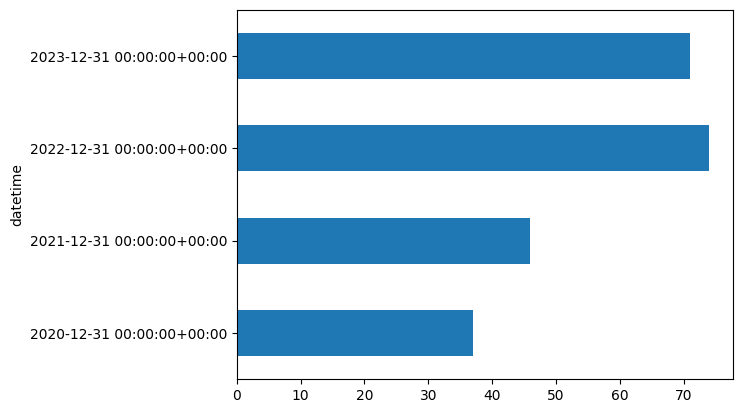

In [85]:
short_athensvoice_df['full_text'].resample('Y').count().plot(kind='barh')

<Axes: xlabel='datetime'>

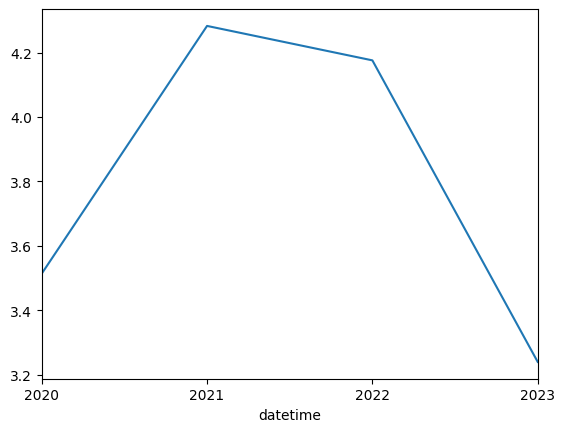

In [86]:
short_athensvoice_df['positive'].resample('Y').mean().plot()

<Axes: xlabel='datetime'>

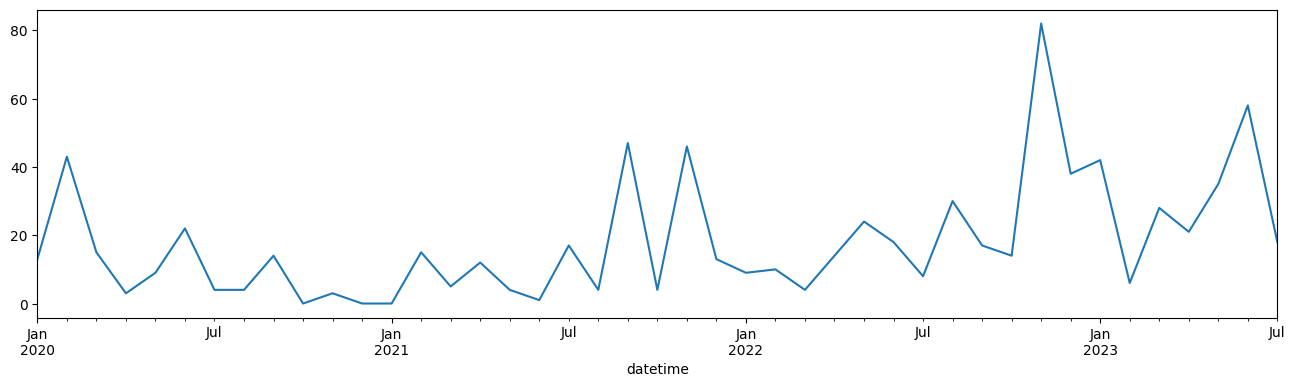

In [87]:
short_athensvoice_df['negative'].resample('M').sum().plot(figsize=(16,4))

<Axes: xlabel='datetime'>

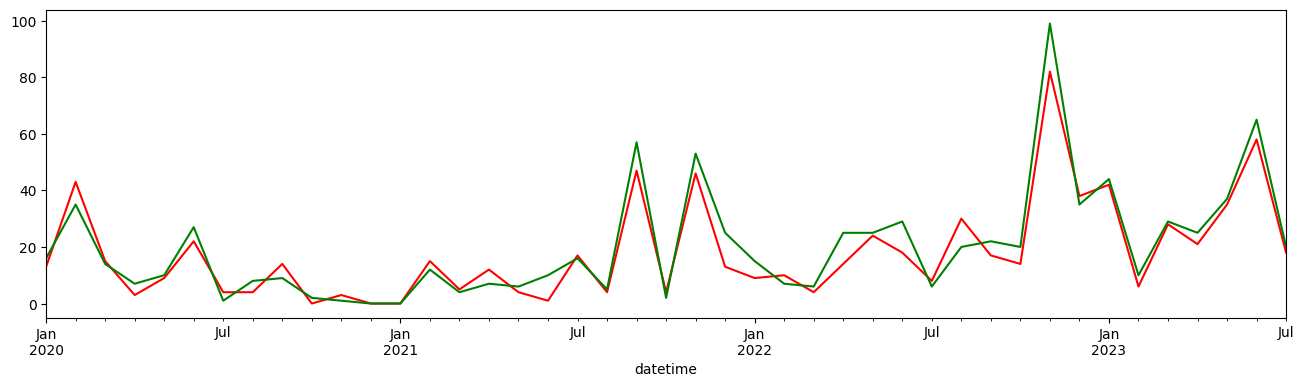

In [88]:
ax = short_athensvoice_df['negative'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_athensvoice_df['positive'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

In [89]:
plt.style.use('default')

In [90]:
plt.style.use('Solarize_Light2')

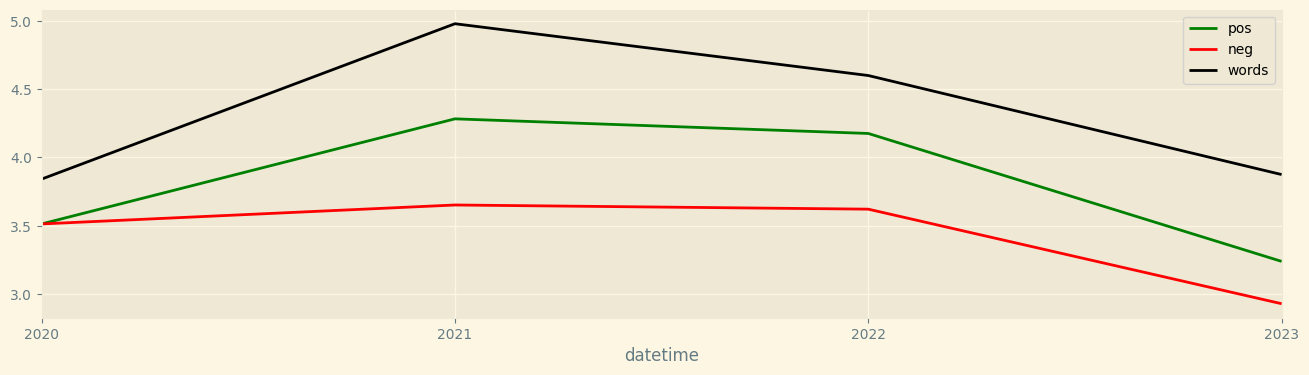

In [91]:
ax = short_athensvoice_df['positive'].resample('Y').mean().plot(figsize=(16,4), #ΜΟ λέξεων κάθε συναισθήματος
                                                          color = 'green', label='pos')
short_athensvoice_df['negative'].resample('Y').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
(short_athensvoice_df['full_text'].str.len().resample('Y').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [92]:
plt.style.use('seaborn-v0_8-darkgrid')

In [93]:
short_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'] = short_athensvoice_df.positive*100//short_athensvoice_df[['positive','negative']].sum(
        axis=1) - short_athensvoice_df.negative*100//short_athensvoice_df[['positive','negative']].sum(axis=1)

short_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'].resample('Y').mean().plot(kind='bar',
                                                                               color=(short_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'].resample('Y').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

<Axes: xlabel='datetime'>

In [94]:
short_athensvoice_df[(short_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'] == short_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'].max()) | #το περισσότερο θετικό
                  (short_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'] == short_athensvoice_df['(-)αρνητικότητα | θετικότητα(+)'].min()) #περισσότερο αρνητικό
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

index  positive  negative  \
datetime                                               
2023-07-12 05:26:22+00:00      1         0         1   
2023-06-30 11:22:37+00:00      7         2         0   
2023-05-15 05:33:46+00:00     29         0         2   
2023-05-02 05:37:00+00:00     32         4         0   
2023-04-23 14:20:29+00:00     38         5         0   
2023-04-22 08:03:00+00:00     39         0         1   
2023-03-27 16:44:42+00:00     49         0         1   
2023-03-20 09:05:00+00:00     52         0         1   
2023-01-17 08:10:00+00:00     64         0         1   
2023-01-04 14:05:00+00:00     68         0         2   
2023-01-04 07:00:00+00:00     70         0         3   
2022-12-11 09:56:43+00:00     80         4         0   
2022-11-26 18:12:00+00:00     85         1         0   
2022-11-18 06:09:59+00:00     90         2         0   
2022-11-03 11:12:00+00:00     93         2         0   
2022-10-20 08:51:00+00:00     97         0         1   
2022-07-25 08:49:00+00:00    113         0         1   
2022-07-05 11:31:56+00:00    117         0         3   
2022-05-23 07:07:00+00:00    125         1         0   
2022-05-13 15:17:00+00:00    128         0         2   
2022-03-06 21:46:00+00:00    136         0         3   
2022-02-09 08:16:00+00:00    138         0         1   
2021-06-26 10:00:59+00:00    179         2         0   
2021-06-22 06:04:18+00:00    180         5         0   
2021-06-11 09:23:00+00:00    181         3         0   
2021-06-11 05:41:00+00:00    182         0         1   
2021-04-29 10:11:00+00:00    185         0         5   
2021-02-05 11:43:00+00:00    192         0         2   
2020-11-20 06:19:09+00:00    193         0         1   
2020-10-04 09:51:37+00:00    195         2         0   
2020-04-10 15:51:00+00:00    214         4         0   
2020-01-22 12:33:00+00:00    226         1         0   
2020-01-21 14:55:28+00:00    227         0         1   

                           (-)αρνητικότητα | θετικότητα(+)  
datetime                                                    
2023-07-12 05:26:22+00:00                           -100.0  
2023-06-30 11:22:37+00:00                            100.0  
2023-05-15 05:33:46+00:00                           -100.0  
2023-05-02 05:37:00+00:00                            100.0  
2023-04-23 14:20:29+00:00                            100.0  
2023-04-22 08:03:00+00:00                           -100.0  
2023-03-27 16:44:42+00:00                           -100.0  
2023-03-20 09:05:00+00:00                           -100.0  
2023-01-17 08:10:00+00:00                           -100.0  
2023-01-04 14:05:00+00:00                           -100.0  
2023-01-04 07:00:00+00:00                           -100.0  
2022-12-11 09:56:43+00:00                            100.0  
2022-11-26 18:12:00+00:00                            100.0  
2022-11-18 06:09:59+00:00                            100.0  
2022-11-03 11:12:00+00:00                            100.0  
2022-10-20 08:51:00+00:00                           -100.0  
2022-07-25 08:49:00+00:00                           -100.0  
2022-07-05 11:31:56+00:00                           -100.0  
2022-05-23 07:07:00+00:00                            100.0  
2022-05-13 15:17:00+00:00                           -100.0  
2022-03-06 21:46:00+00:00                           -100.0  
2022-02-09 08:16:00+00:00                           -100.0  
2021-06-26 10:00:59+00:00                            100.0  
2021-06-22 06:04:18+00:00                            100.0  
2021-06-11 09:23:00+00:00                            100.0  
2021-06-11 05:41:00+00:00                           -100.0  
2021-04-29 10:11:00+00:00                           -100.0  
2021-02-05 11:43:00+00:00                           -100.0  
2020-11-20 06:19:09+00:00                           -100.0  
2020-10-04 09:51:37+00:00                            100.0  
2020-04-10 15:51:00+00:00                            100.0  
2020-01-22 12:33:00+00:00                            

In [95]:
athensvoice_full_articles_df.loc[[38,180,185], ['url','title', 'full_text']]

url  \
38   https://www.athensvoice.gr/epikairotita/ellada...   
180  https://www.athensvoice.gr/epikairotita/ellada...   
185  https://www.athensvoice.gr/epikairotita/ellada...   

                                                title  \
38     Τροχαίο με οκτώ τραυματίες στη Λεωφόρο Σχιστού   
180     Αυτοκίνητο ανατράπηκε στη γέφυρα της Αμφιθέας   
185  Μείωση 37,2% σημείωσαν τα τροχαία τον Φεβρουάριο   

                                             full_text  
38   Τροχαίο με οκτώ τραυματίες σημειώθηκε σήμερα, ...  
180  Ανατροπή ενός οχήματος σημειώθηκε νωρίς το πρω...  
185  Μείωση 37,2% σημείωσαν τα οδικά τροχαία, που σ...